In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [48]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
df = pd.read_csv("fcc-forum-pageviews.csv" , index_col = 'date')
df.index = pd.to_datetime(df.index)

In [49]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [50]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df= df[((df['value'] > df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975)))]

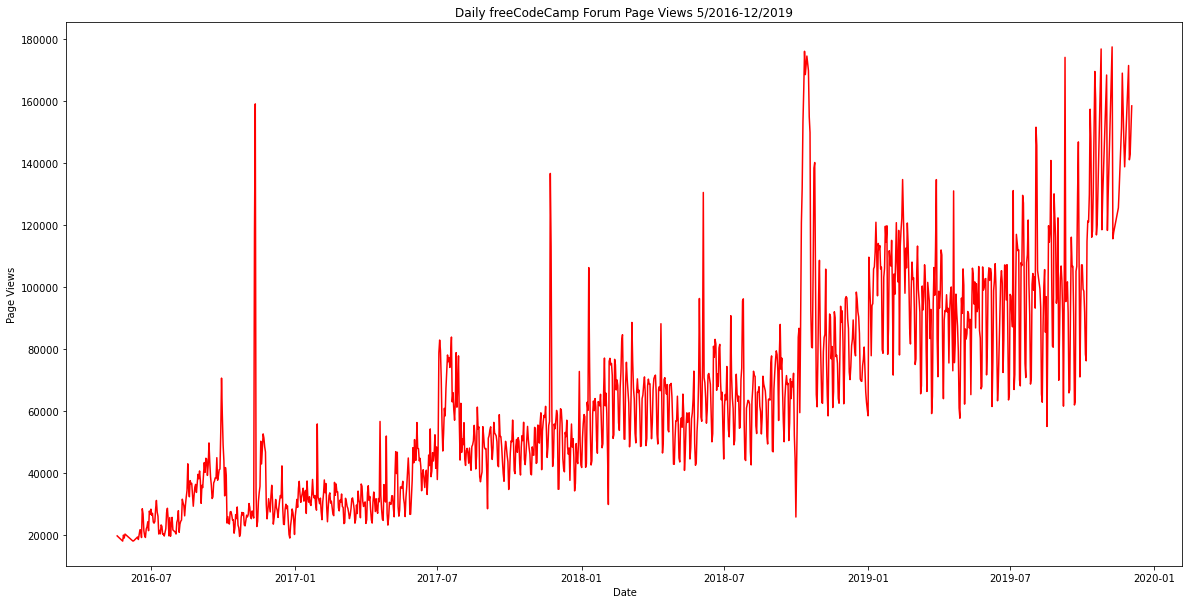

In [6]:
'''
Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
'''
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(df.value , color = 'Red')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views');

In [56]:
'''
Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". 
It should show average daily page views for each month grouped by year. 
The legend should show month labels and have a title of "Months". 
On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
'''
df['year'] = df.index.year
df['month'] = df.index.month_name()
df.head(2)
df.count(numeric_only = True)

value    1238
year     1238
dtype: int64

In [8]:
df.groupby(['year','month']).mean().head()

value
year month                 
2016 August    31049.193548
     December  27832.419355
     July      24109.678571
     June      21875.105263
     May       19432.400000

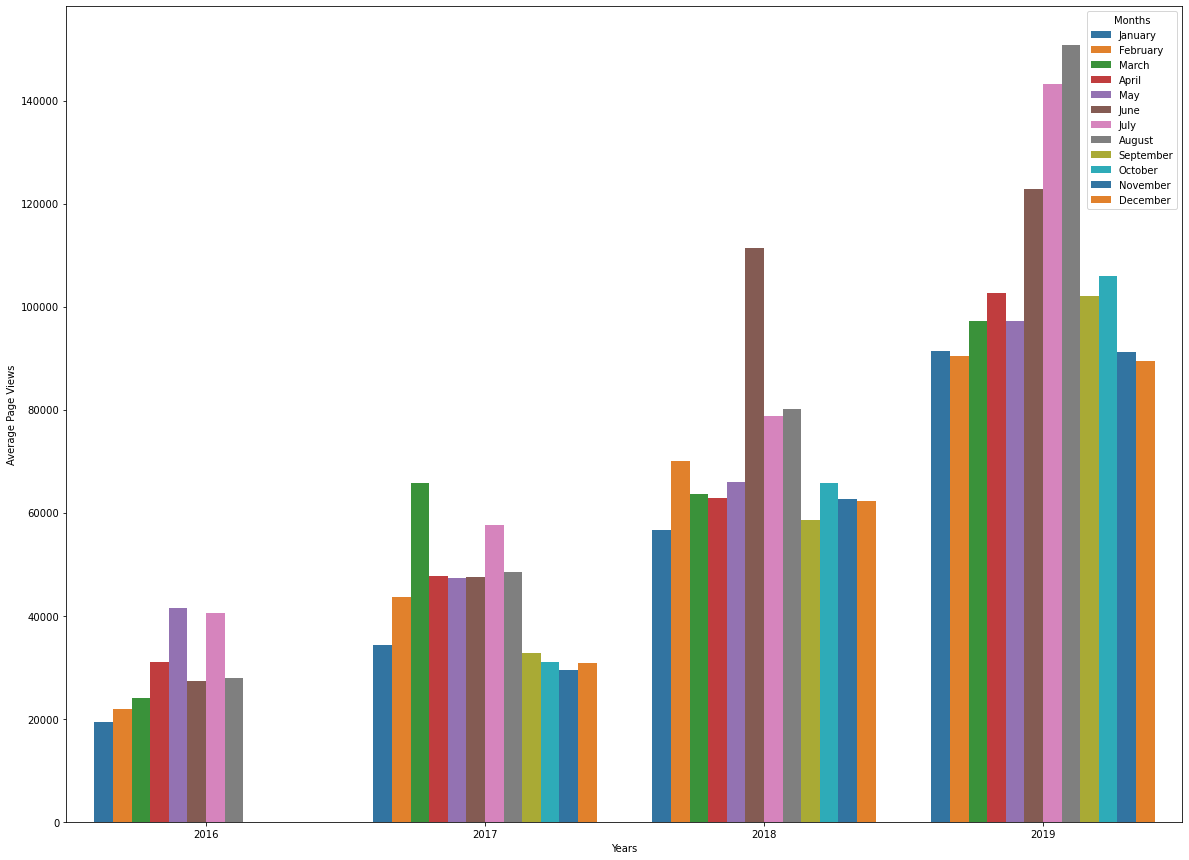

In [57]:
fig = plt.gcf()
fig.set_size_inches(20,15)
sns.barplot(x = 'year' , y = 'value' , data = df , hue = 'month' , palette = "tab10" , ci = None )
plt.legend(title = "Months" , labels = ['January' ,'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December'])
plt.xlabel("Years")
plt.ylabel("Average Page Views");

In [36]:
df['month'] = df.index.strftime("%b")
df.head(3)

,value,month
date,,
2016-05-09,1201,May
2016-05-10,2329,May
2016-05-11,1716,May


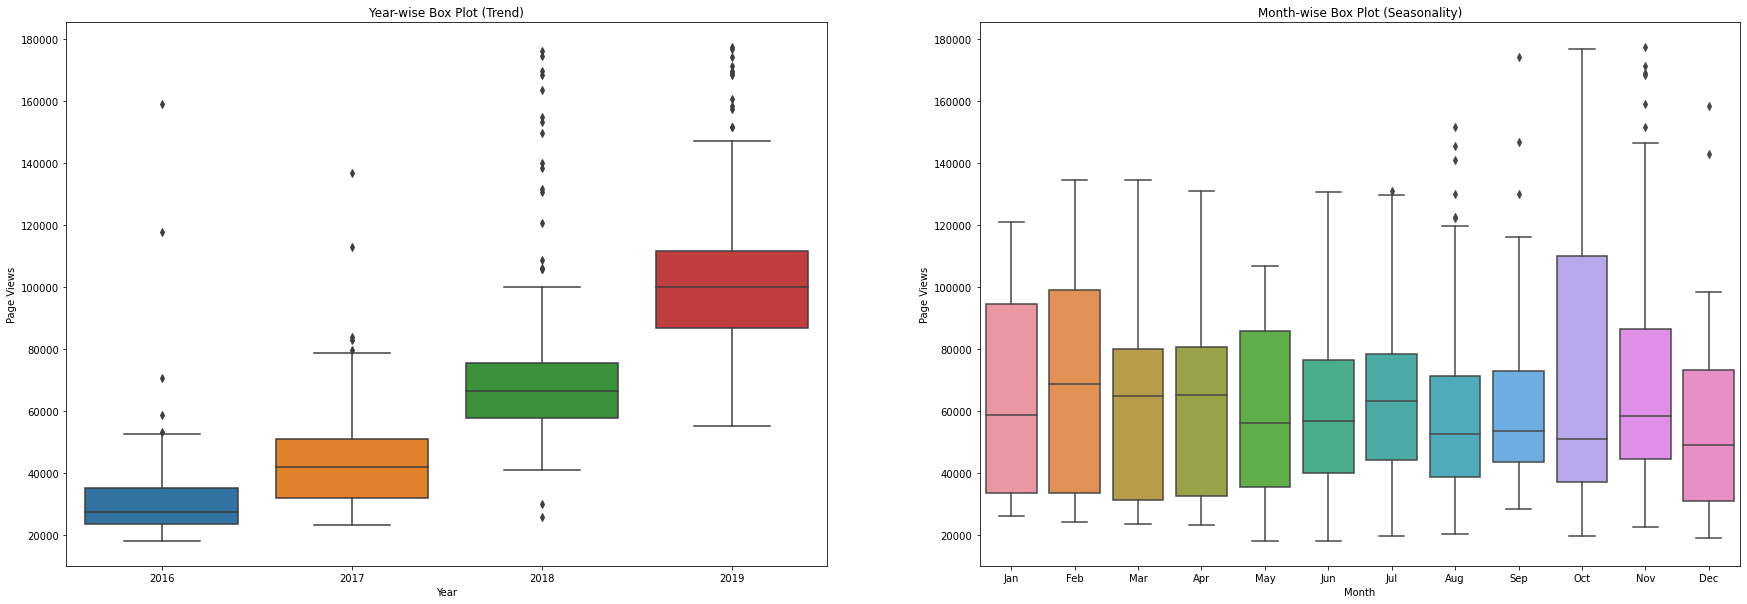

In [23]:
'''
Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
These box plots should show how the values are distributed within a given year or month and how it compares over time. 
The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.
'''
fig , ax = plt.subplots(1,2)
fig.set_size_inches(30,10)
sns.boxplot(x = 'year' , y = 'value' , data = df , ax = ax[0]).set(title = "Year-wise Box Plot (Trend)" , xlabel = "Year" , ylabel = "Page Views")

sns.boxplot(x = 'month' , y = 'value' , data = df , ax = ax[1] , order = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")).set(title = "Month-wise Box Plot (Seasonality)", xlabel = "Month" , ylabel = "Page Views");